In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
def linear_regression_fit(X, y, learning_rate=0.01, n_iter=1000):
    n_samples, n_features = X.shape
    weights, bias = np.zeros(n_features), 0
    loss_history = []
    
    for _ in range(n_iter):
        y_pred = np.dot(X, weights) + bias
        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)
        
        weights -= learning_rate * dw
        bias -= learning_rate * db        
        loss = np.mean((y_pred - y)**2)
        loss_history.append(loss)
        
    return weights, bias, loss_history

def predict(X, weights, bias):
    return np.dot(X, weights) + bias

def parameter_correlation(X):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    cov_matrix = np.linalg.inv(X_bias.T @ X_bias)
    std_dev = np.sqrt(np.diag(cov_matrix))
    return cov_matrix / np.outer(std_dev, std_dev)

In [5]:
n_samples = 100
X = np.random.randn(n_samples, 2)
true_weights, true_bias = np.array([3.5, -2.8]), 1.7
y = true_bias + np.dot(X, true_weights) + np.random.normal(0, 1, n_samples)
X_scaled = StandardScaler().fit_transform(X)

weights, bias, loss_history = linear_regression_fit(
    X_scaled, y, learning_rate=0.1, n_iter=50
)

print("Learned weights:", weights)
print("Learned bias:", bias)
print("\nParameter correlation matrix:")
print(parameter_correlation(X_scaled))


Learned weights: [ 3.48503214 -2.53406621]
Learned bias: 1.7958281509452043

Parameter correlation matrix:
[[ 1.00000000e+00  6.52508586e-18 -6.02140423e-17]
 [ 6.52508586e-18  1.00000000e+00 -5.31291496e-02]
 [-6.02140423e-17 -5.31291496e-02  1.00000000e+00]]


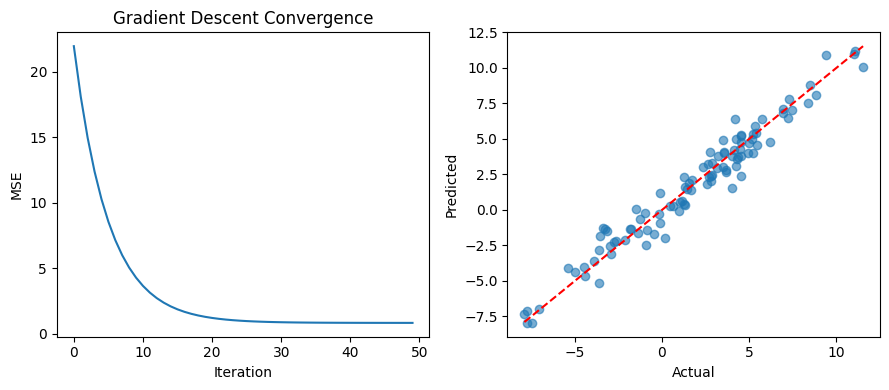

In [ ]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(range(len(loss_history)), loss_history)
plt.title("Gradient Descent Convergence")
plt.xlabel("Iteration")
plt.ylabel("MSE")

plt.subplot(1, 2, 2)
y_pred = predict(X_scaled, weights, bias)
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()